In [1]:
import math
import csv
import tqdm
import time
import timeit
import cProfile
import numpy as np
from collections import deque

# Algoritmos de Ordenação

## Construção do algoritmo

### Tradicional
Utilizando Lista

In [2]:
def divide_partes(vetor:list[int], n_partes:int)->list[deque[int]]:
  partes:list[deque[int]] = []
  sqrt_n:int = int(math.sqrt(n_partes))
  for i in range(0, n_partes, sqrt_n):
      swap_d:list[int] = list(np.array(vetor[i:i + sqrt_n]) * -1)
      swap:deque[int] = deque(swap_d)
      partes.append(swap)
  return partes


def shell_sort(vetor:deque[int])->deque[int]:
    tamanho:int = len(vetor)
    bloco:int = tamanho // 2
    while bloco > 0:
        for i in range(bloco, tamanho):
            temp = vetor[i]
            j = i
            while j >= bloco and vetor[j - bloco] > temp:
                vetor[j] = vetor[j - bloco]
                j -= bloco
            vetor[j] = temp
        bloco //= 2
    return vetor


def ordenar_partes_s(partes:list[deque[int]], tamanho:int)->list[deque[int]]:
  for i in range(0, tamanho):
      partes[i] = shell_sort(partes[i])
  return partes


def encontrar_maiores(partes:list[deque[int]], indices:dict, maiores:list[int])->int:
    swap_m:np.ndarray[int] = np.array(maiores)
    indice_maximo = swap_m.argmax()
    maximo =  maiores[indice_maximo]
    indice = indices[maximo]
    partes[indice].pop()
    swap:deque[int] = partes[indice]
    if (swap) and (not swap[-1] in maiores):
        maiores.append(1*swap[-1])
    maiores.pop(indice_maximo)
    return -maximo

def sqrt_sort_is(vetor:list[int])->list[int]:
    n:int = len(vetor)
    vetor_swap:list[int] = []
    partes:list[deque[int]] = divide_partes(vetor, n)
    tamanho:int = len(partes)
    partes = ordenar_partes_s(partes, tamanho)
    maiores:list[int] = [partes[i][-1] for i in range(0, tamanho)]
    indices:dict = {p:i for i in range(0, tamanho) for p in partes[i]}
    i = 0
    while i < n:
        elemento = encontrar_maiores(partes, indices, maiores)
        vetor_swap.append(elemento)
        i += 1
    return vetor_swap

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Admini\AppData\Local\Temp\ipykernel_5284\4003323426.py:2: SyntaxWarning: invalid escape sequence '\s'
  """


### Estrutura Heap

In [3]:
class Heap:
    def __init__(self):
        self.heap:list[int] = []

    def parent(self, i:int)->int:
        return (i - 1) // 2

    def left_child(self, i:int)->int:
        return 2 * i + 1

    def right_child(self, i:int)->int:
        return 2 * i + 2

    def insert(self, key:int)->None:
        self.heap.append(-1*key)
        i = len(self.heap) - 1
        while i > 0 and self.heap[self.parent(i)] < self.heap[i]:
            self.heap[self.parent(i)], self.heap[i] = self.heap[i], self.heap[self.parent(i)]
            i = self.parent(i)

    def heapify(self, i:int)->None:
        largest = i
        left = self.left_child(i)
        right = self.right_child(i)

        if left < len(self.heap) and self.heap[left] > self.heap[largest]:
            largest = left

        if right < len(self.heap) and self.heap[right] > self.heap[largest]:
            largest = right

        if largest != i:
            self.heap[i], self.heap[largest] = self.heap[largest], self.heap[i]
            self.heapify(largest)

    def extract_max(self)->int|None:
        if len(self.heap) == 0:
            return None
        if len(self.heap) == 1:
            return self.heap.pop()

        max_val = self.heap[0]
        self.heap[0] = self.heap.pop()
        self.heapify(0)
        return -max_val

    def get_max(self)->int|None:
        return self.heap[0] if self.heap else None

In [4]:
class HeapList:
    def __init__(self):
        self.heap:list[Heap] = []

    def parent(self, i:int)->int:
        return (i - 1) // 2

    def left_child(self, i:int)->int:
        return 2 * i + 1

    def right_child(self, i:int)->int:
        return 2 * i + 2

    def insert(self, key:Heap)->None:
        if len(key.heap) != 0:
            self.heap.append(key)
            i = len(self.heap) - 1
            while i > 0 and self.heap[self.parent(i)].get_max() < self.heap[i].get_max():
                self.heap[self.parent(i)], self.heap[i] = self.heap[i], self.heap[self.parent(i)]
                i = self.parent(i)

    def heapify(self, i:int)->None:
        largest = i
        left = self.left_child(i)
        right = self.right_child(i)

        if left < len(self.heap) and self.heap[left].get_max() > self.heap[largest].get_max():
            largest = left

        if right < len(self.heap) and self.heap[right].get_max() > self.heap[largest].get_max():
            largest = right

        if largest != i:
            self.heap[i], self.heap[largest] = self.heap[largest], self.heap[i]
            self.heapify(largest)

    def extract_max(self)->Heap|None:
        if len(self.heap) == 0:
            return None
        if len(self.heap) == 1:
            return self.heap.pop()

        max_val = self.heap[0]
        self.heap[0] = self.heap.pop()
        self.heapify(0)
        return max_val


    def get_max(self)->Heap|None:
        return self.heap[0] if self.heap else None

In [5]:
def make_heap(vetor:list[int])->Heap:
  heap:Heap = Heap()
  for i in vetor:
    heap.insert(i)
  return heap

def insert_heap(heap:Heap, elem:int)->None:
   heap.insert(-1*elem)

def remover_maximo(heap:HeapList)->Heap:
  return heap.extract_max()

def pegar_maior_elemento_heap(heap_maiores:HeapList)->Heap:
  max_value = remover_maximo(heap_maiores)
  return max_value

def particionar(vetor:list[int], n_partes:int)->list[list[int]]:
  partes:list[list[int]] = []
  sqrt_n:int = int(math.sqrt(n_partes))
  for i in range(0, n_partes, sqrt_n):
      partes.append(vetor[i:i + sqrt_n])
  return partes

def ordenar_partes(partes:list[list])->HeapList:
  partes_heap:HeapList = HeapList()
  for i in range(0, len(partes)):
      item:Heap = Heap()
      item = make_heap(partes[i])
      partes_heap.insert(item)
  return partes_heap


def sqrt_sort_h(vetor:list[int])->list[int]:
  tamanho:int = len(vetor)
  vetor_swap:list[int] = []
  partes:list[list[int]] = particionar(vetor, tamanho)
  partes_heap:HeapList = ordenar_partes(partes)
  while partes_heap.heap:
      item_heap = pegar_maior_elemento_heap(partes_heap)
      if item_heap.heap:
        elemento = item_heap.extract_max()
        vetor_swap.append(elemento)
        partes_heap.insert(item_heap)
  return vetor_swap


## Coleta de Dados

### CProfile

In [6]:
arr = np.random.permutation(10).tolist()

In [7]:
cProfile.run('sqrt_sort_is(arr)')

         91 function calls in 0.001 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 1535460186.py:1(divide_partes)
        4    0.000    0.000    0.000    0.000 1535460186.py:11(shell_sort)
        1    0.000    0.000    0.000    0.000 1535460186.py:26(ordenar_partes_s)
       10    0.000    0.000    0.000    0.000 1535460186.py:32(encontrar_maiores)
        1    0.000    0.000    0.001    0.001 1535460186.py:44(sqrt_sort_is)
        1    0.000    0.000    0.001    0.001 <string>:1(<module>)
        1    0.000    0.000    0.001    0.001 {built-in method builtins.exec}
        6    0.000    0.000    0.000    0.000 {built-in method builtins.len}
        1    0.000    0.000    0.000    0.000 {built-in method math.sqrt}
       14    0.000    0.000    0.000    0.000 {built-in method numpy.array}
       20    0.000    0.000    0.000    0.000 {method 'append' of 'list' objects}
       

In [8]:
cProfile.run('sqrt_sort_h(arr)')

         386 function calls (382 primitive calls) in 0.001 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       12    0.000    0.000    0.000    0.000 122300882.py:11(right_child)
       14    0.000    0.000    0.000    0.000 122300882.py:14(insert)
        1    0.000    0.000    0.000    0.000 122300882.py:2(__init__)
     12/8    0.000    0.000    0.000    0.000 122300882.py:22(heapify)
       10    0.000    0.000    0.000    0.000 122300882.py:37(extract_max)
       25    0.000    0.000    0.000    0.000 122300882.py:5(parent)
       12    0.000    0.000    0.000    0.000 122300882.py:8(left_child)
        4    0.000    0.000    0.000    0.000 1294726576.py:1(make_heap)
       10    0.000    0.000    0.000    0.000 1294726576.py:10(remover_maximo)
       10    0.000    0.000    0.000    0.000 1294726576.py:13(pegar_maior_elemento_heap)
        1    0.000    0.000    0.000    0.000 1294726576.py:17(particionar)
        

### Calculate Time

In [9]:
def calculate_time(function, *args):
  """
  Calculates the execution time of a function.

  Args:
    function: The function to be timed.
    *args: Arguments to be passed to the function.

  Returns:
    The execution time of the function in seconds.
  """
  start_time = time.time()
  function(*args)
  end_time = time.time()
  return end_time - start_time

In [10]:
arr = np.random.permutation(10000).tolist()
calculate_time(sqrt_sort_h, arr)

1.2702162265777588

In [11]:
calculate_time(sqrt_sort_is, arr)

0.8394780158996582

In [12]:
arr = np.random.permutation(100000).tolist()
calculate_time(sqrt_sort_h, arr)

12.765107870101929

In [13]:
calculate_time(sqrt_sort_is, arr)

16.100041151046753

In [14]:
arr = np.random.permutation(1000000).tolist()
calculate_time(sqrt_sort_h, arr)

93.03142833709717

In [15]:
calculate_time(sqrt_sort_is, arr)

223.51168775558472

In [16]:
arr = np.random.permutation(10000000).tolist()
calculate_time(sqrt_sort_h, arr)

643.0220170021057

In [17]:
calculate_time(sqrt_sort_is, arr)

4310.3797171115875

In [18]:
arr = np.random.permutation(100000000).tolist()
calculate_time(sqrt_sort_h, arr)

5965.079303741455

In [19]:
calculate_time(sqrt_sort_is, arr)

207773.45311522484

### Timeit

In [6]:
def tempo_sqrt_sort(index:int):
  lista_items:list[dict] = []
  tamanho_dos_vetores: list[int]  = [10**4,10**5,10**6, 10**7, 10**8]
  epocas:list = [10, 10, 10, 5, 2]
  for i in tqdm.tqdm(range(epocas[index])):
    vetor:list[int] = np.random.permutation(tamanho_dos_vetores[index]).tolist()
    item = {
          "EPOCA": i,
          "TAMANHO": tamanho_dos_vetores[index],
          "TEMPO_SQRT_SORT_IS": timeit.timeit(lambda: sqrt_sort_is(vetor), number=1),
          "TEMPO_SQRT_SORT_H": timeit.timeit(lambda: sqrt_sort_h(vetor), number=1),
          "VETOR": vetor
    }
    lista_items.append(item)

  keys = lista_items[0].keys()

  with open('../data/dados_sort_10_'+str(4+index)+'.csv', 'w', newline='') as output_file:
      dict_writer = csv.DictWriter(output_file, keys)
      dict_writer.writeheader()
      dict_writer.writerows(lista_items)

In [7]:
def tempo_sqrt_sort_worst_case():
  lista_items:list[dict] = []
  tamanho_dos_vetores: list[int]  = [10**4,10**5,10**6, 10**7, 10**8]
  epocas:list = [1]
  j = 0
  for tamanho in tamanho_dos_vetores:
    for i in tqdm.tqdm(range(epocas[0])):
        vetor:list[int] = np.arange(0,tamanho).tolist()
        vetor.reverse()
        item = {
            "EPOCA": i + j,
            "TAMANHO": tamanho,
            "TEMPO_SQRT_SORT_IS": timeit.timeit(lambda: sqrt_sort_is(vetor), number=1),
            "TEMPO_SQRT_SORT_H": timeit.timeit(lambda: sqrt_sort_h(vetor), number=1),
            "VETOR": vetor
        }
        lista_items.append(item)
    j += 1
  keys = lista_items[0].keys()

  with open('../data/dados_sort_worst_case.csv', 'w', newline='') as output_file:
      dict_writer = csv.DictWriter(output_file, keys)
      dict_writer.writeheader()
      dict_writer.writerows(lista_items)

In [22]:
tempo_sqrt_sort(0)

100%|██████████| 10/10 [00:05<00:00,  1.73it/s]


In [23]:
tempo_sqrt_sort(1)

100%|██████████| 10/10 [01:19<00:00,  7.98s/it]


In [24]:
tempo_sqrt_sort(2)

100%|██████████| 10/10 [36:01<00:00, 216.17s/it]


In [25]:
tempo_sqrt_sort(3)

100%|██████████| 5/5 [6:19:51<00:00, 4558.26s/it]  


In [8]:
tempo_sqrt_sort(4)

100%|██████████| 2/2 [121:12:04<00:00, 218162.25s/it]  


In [9]:
tempo_sqrt_sort_worst_case()

100%|██████████| 1/1 [24:36:55<00:00, 88615.98s/it]


In [1]:
import pandas as pd

In [2]:
dataset_104:pd.DataFrame = pd.read_csv('../data/dados_sort_10_4.csv')
dataset_105:pd.DataFrame = pd.read_csv('../data/dados_sort_10_5.csv')
dataset_106:pd.DataFrame = pd.read_csv('../data/dados_sort_10_6.csv')
dataset_107:pd.DataFrame = pd.read_csv('../data/dados_sort_10_7.csv')
dataset_108:pd.DataFrame = pd.read_csv('../data/dados_sort_10_8.csv')
dataset_worst_case:pd.DataFrame = pd.read_csv('../data/dados_sort_worst_case.csv')

In [29]:
dataset_worst_case[['TEMPO_SQRT_SORT_IS', 'TEMPO_SQRT_SORT_H']]

,TEMPO_SQRT_SORT_IS,TEMPO_SQRT_SORT_H
0,0.488020,0.563979
1,5.422004,7.265390
2,83.972161,47.683766
3,3733.268252,583.947802
4,81714.739082,6896.334016


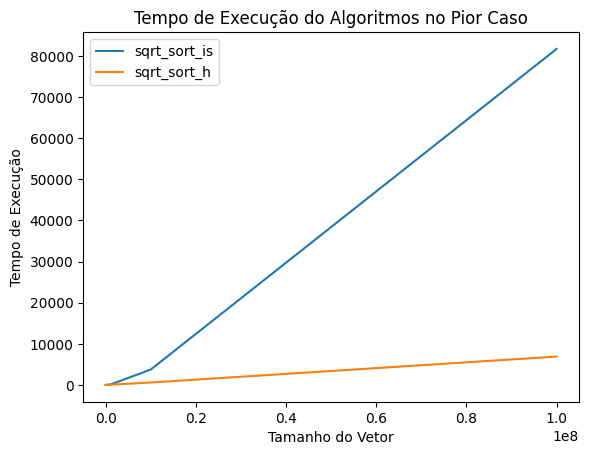

In [33]:
import matplotlib.pyplot as plt
dataset_worst_case.plot(x='TAMANHO', y=['TEMPO_SQRT_SORT_IS', 'TEMPO_SQRT_SORT_H'], kind='line')

plt.xlabel('Tamanho do Vetor')
plt.ylabel('Tempo de Execução')
plt.title('Tempo de Execução do Algoritmos no Pior Caso')
plt.legend(['sqrt_sort_is', 'sqrt_sort_h'])
plt.show()

In [3]:
joined_dataset = pd.concat([dataset_104, dataset_105, dataset_106, dataset_107, dataset_108])

In [25]:
joined_dataset['MELHORIA'] = (joined_dataset['TEMPO_SQRT_SORT_IS'] - joined_dataset['TEMPO_SQRT_SORT_H'])/joined_dataset['TEMPO_SQRT_SORT_IS']

In [26]:
joined_dataset.groupby(['TAMANHO']).agg({'TEMPO_SQRT_SORT_IS': ['mean', 'std'], 'TEMPO_SQRT_SORT_H': ['mean', 'std'], 'MELHORIA': ['mean', 'std']})

TEMPO_SQRT_SORT_IS               TEMPO_SQRT_SORT_H              \
                        mean           std              mean         std   
TAMANHO                                                                    
10000               0.281059      0.007237          0.293092    0.003798   
100000              4.250662      1.367561          2.269303    0.726145   
1000000           132.613343     56.988517         35.318069   15.706704   
10000000         2784.969753   1116.074849        240.083330   98.473369   
100000000       66394.844894  29350.448130       2008.601037  777.476031   

           MELHORIA            
               mean       std  
TAMANHO                        
10000     -0.043658  0.039770  
100000     0.464693  0.012526  
1000000    0.734745  0.010592  
10000000   0.914128  0.001128  
100000000  0.969340  0.001844

In [12]:
%pip install matplotlib

  Using cached contourpy-1.2.1-cp312-cp312-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     ------- ------------------------------- 30.7/165.9 kB 1.3 MB/s eta 0:00:01
     ------------------ ------------------ 81.9/165.9 kB 919.0 kB/s eta 0:00:01
     -------------------------------------- 165.9/165.9 kB 1.1 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.5-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
    --------------------------------------- 0.1/7.8 MB 3.3 MB/s eta 0:00:03
    --------------------------------------- 0.2/7.8 MB 2.0 MB/s eta 0:00:04
    --------------------------------------- 0.2/7.8 MB 1.7 MB/s eta 0:00:05
   - -------------------------------------- 0.3/7.8 MB 1.4 MB/s eta 0:00:06
   - -------------------------------------- 0.3/7.8 MB 1.5 MB/s eta 0:00:06
   -- -----------------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


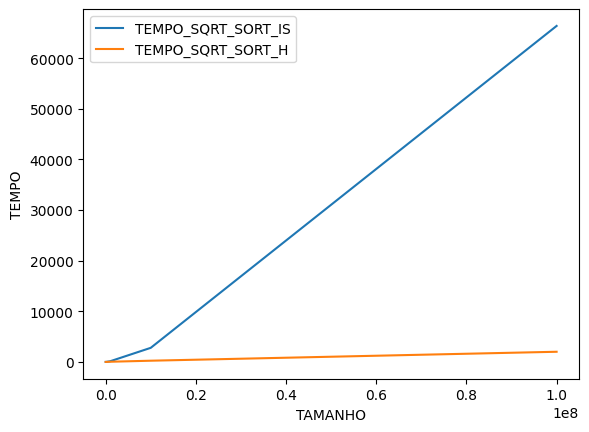

In [46]:
import matplotlib.pyplot as plt

#plot equal to drawing a line chart

joined_dataset.groupby('TAMANHO')[['TEMPO_SQRT_SORT_IS', 'TEMPO_SQRT_SORT_H']].mean().plot(kind='line')
plt.xlabel('TAMANHO')
plt.ylabel('TEMPO')
plt.legend(['TEMPO_SQRT_SORT_IS', 'TEMPO_SQRT_SORT_H'])
plt.show()

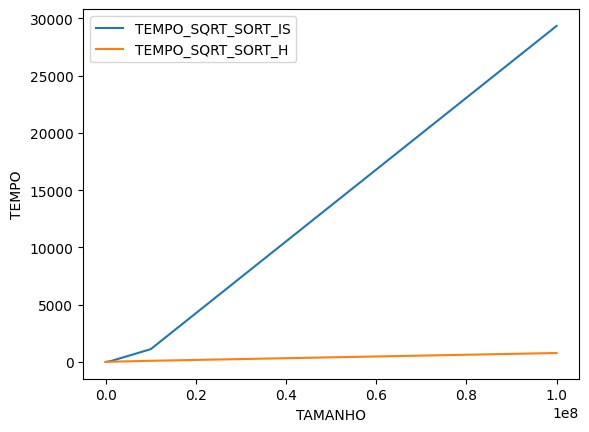

In [47]:
import matplotlib.pyplot as plt

#plot equal to drawing a line chart

joined_dataset.groupby('TAMANHO')[['TEMPO_SQRT_SORT_IS', 'TEMPO_SQRT_SORT_H']].std().plot(kind='line')
plt.xlabel('TAMANHO')
plt.ylabel('TEMPO')
plt.legend(['TEMPO_SQRT_SORT_IS', 'TEMPO_SQRT_SORT_H'])
plt.show()

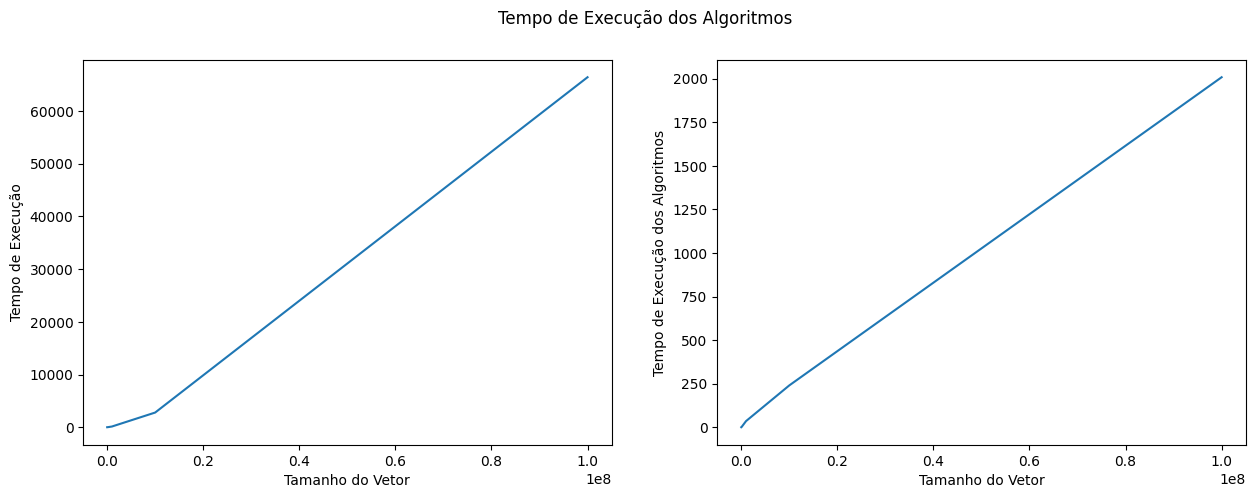

In [44]:
import matplotlib.pyplot as plt

#plot two graphs in different figures
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
fig.suptitle('Tempo de Execução dos Algoritmos')
joined_dataset.groupby('TAMANHO')['TEMPO_SQRT_SORT_IS'].mean().plot(kind='line', ax=ax[0])
ax[0].set_xlabel('Tamanho do Vetor')
ax[0].set_ylabel('Tempo de Execução')
joined_dataset.groupby('TAMANHO')['TEMPO_SQRT_SORT_H'].mean().plot(kind='line', ax=ax[1])
ax[1].set_xlabel('Tamanho do Vetor')
ax[1].set_ylabel('Tempo de Execução dos Algoritmos')
plt.show()

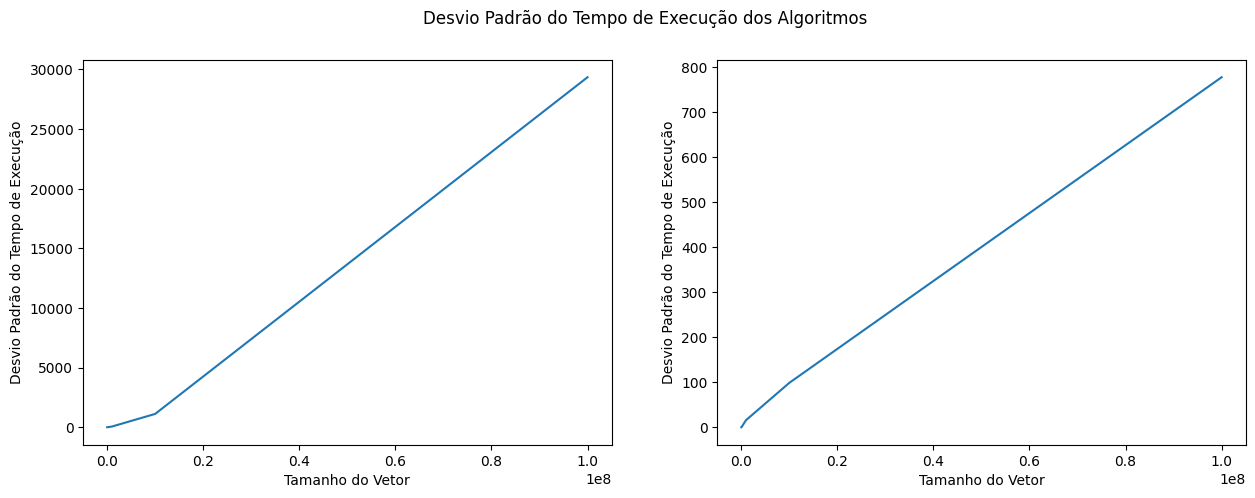

In [45]:
import matplotlib.pyplot as plt

#plot two graphs in different figures
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
fig.suptitle('Desvio Padrão do Tempo de Execução dos Algoritmos')
joined_dataset.groupby('TAMANHO')['TEMPO_SQRT_SORT_IS'].std().plot(kind='line', ax=ax[0])
ax[0].set_xlabel('Tamanho do Vetor')
ax[0].set_ylabel('Desvio Padrão do Tempo de Execução')
joined_dataset.groupby('TAMANHO')['TEMPO_SQRT_SORT_H'].std().plot(kind='line', ax=ax[1])
ax[1].set_xlabel('Tamanho do Vetor')
ax[1].set_ylabel('Desvio Padrão do Tempo de Execução')
plt.show()

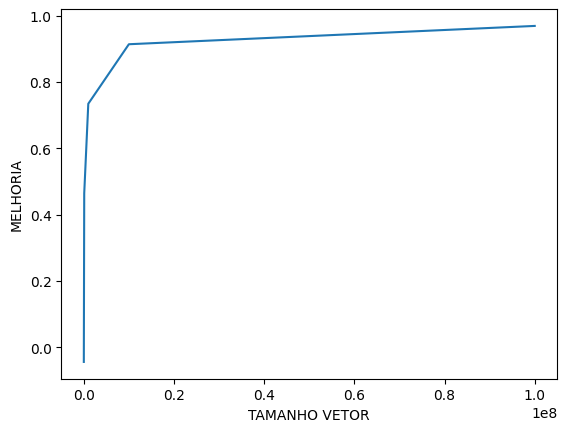

In [49]:
joined_dataset.groupby('TAMANHO')['MELHORIA'].mean().plot(kind='line')

plt.xlabel('TAMANHO VETOR')
plt.ylabel('MELHORIA')
plt.show()